<a href="https://colab.research.google.com/github/Ganesh-Esc/DL-Basics_22/blob/main/DL_Basics_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x))

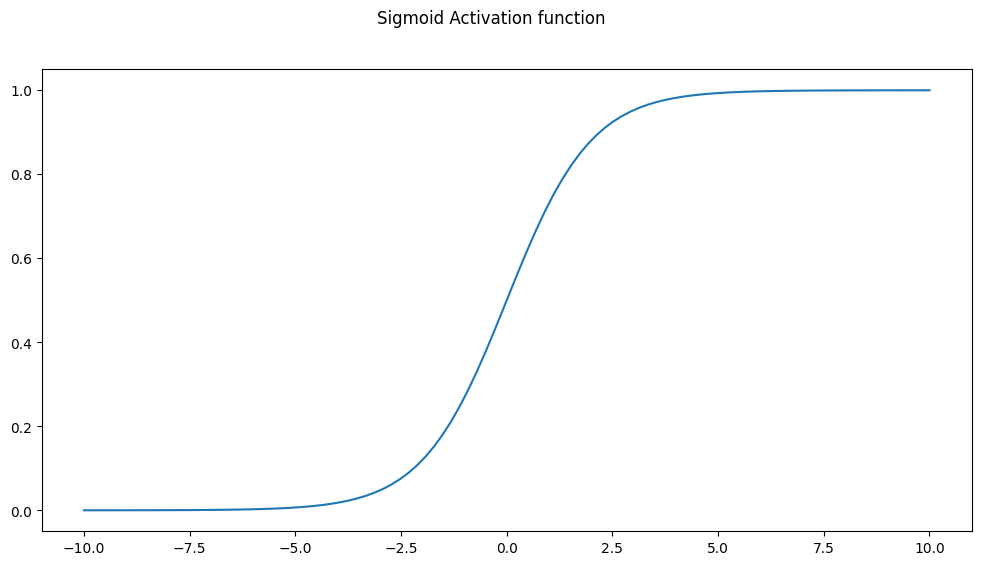

In [4]:
vals=np.linspace(-10,10,num=100,dtype=np.float64)
activation=sigmoid(vals)
fig=plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid Activation function')
plt.plot(vals,activation)
plt.show()

In [5]:
def logic_gate(w1,w2,b):
  return lambda x1,x2: sigmoid(w1*x1+w2*x2+b)

def test(gate):
  for a,b in (0,0),(0,1),(1,0),(1,1):
    print("{},{}:{}".format(a,b,np.round(gate(a,b))))

In [6]:
or_gate=logic_gate(20,20,-10)
test(or_gate)

0,0:0.0
0,1:1.0
1,0:1.0
1,1:1.0


In [7]:
and_gate=logic_gate(20,20,-10)
test(and_gate)

0,0:0.0
0,1:1.0
1,0:1.0
1,1:1.0




*   a single neuron can implement any logical gate but not XOR gate
*   cause XOR gate need 2 layers



FeedForward Networks as Matrix Computations

In [9]:
W_1=np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2=np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3=np.array([[-1,3,-2],[1,-1,3],[3,-2,2],[1,2,1]])
x_in= np.array([.5,.8,.2])
x_mat_in=np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]




1.   def soft_max_vec(vec):
       return np.exp(vec)/(np.sum(np.exp(vec)))
2.   Here we are taking every number of the vector and making to          exponential and dividing with sum of exponentials this makes the sum of elements will be 1 i.e.,to convert these scores into probabilities.

1.   Why Use Exponentials?
      Using the exponential function (exp) and then dividing by the sum is essential for two main reasons:
2.   To Handle Negative Numbers: Neural network outputs (logits) can be   positive, negative, or zero. Since probabilities must be positive, the exp function is used to convert every logit into a positive number.

*   To Create a "Winner-Takes-Most" Distribution: The exponential function grows very rapidly. This means it dramatically amplifies the score of the neuron with the highest logit compared to others. When you normalize by dividing by the sum, this "winner" gets a very high probability, while all others get very low probabilities. This aligns with the goal of classification, which is to confidently select a single class.







In [10]:
z_2=np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [11]:
a_2=sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [12]:
z_3=np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [13]:
a_3=sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [14]:
z_4=np.dot(a_3,W_3)
z_4

array([2.04146788, 1.04718238, 2.41483366])

In [15]:
y_out=soft_max_vec(z_4)
y_out

array([0.35428287, 0.13108031, 0.51463682])

In [16]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [17]:
nn_comp_vec(x_in)

array([0.35428287, 0.13108031, 0.51463682])

In [18]:
nn_comp_mat(x_mat_in)

array([[0.35428287, 0.13108031, 0.51463682],
       [0.31639222, 0.19212974, 0.49147803],
       [0.37331537, 0.16363272, 0.46305191],
       [0.26001684, 0.44746065, 0.29252251],
       [0.31171719, 0.231717  , 0.45656581],
       [0.27944057, 0.44539911, 0.27516032],
       [0.28522388, 0.25665104, 0.45812508]])